In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2023-06-10 11:24:18.964827: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
2.11.0
2.11.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('adult.data', sep=", ",header = None)
test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/var/folders/zy/jl2rn8kj7cx0g35_dvq0zksh0000gn/T/ipykernel_44083/1127659990.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('adult.data', sep=", ",header = None)
/var/folders/zy/jl2rn8kj7cx0g35_dvq0zksh0000gn/T/ipykernel_44083/1127659990.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [5]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

# Zad
Nauczmy model z BatchNormalization

Pamiętaj, że 

* BatchNormalization powinno być dodane przed funkcją katywacji
* ustaw parametr use_bias=False

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100, use_bias=False,input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(10, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5000      
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 50)                0

2023-06-10 11:24:49.263301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [9]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 3s 87us/step - loss: 0.4616 - accuracy: 0.7800 - val_loss: 0.4866 - val_accuracy: 0.7782
Epoch 2/100
30162/30162 [==============================] - 2s 70us/step - loss: 0.3846 - accuracy: 0.8124 - val_loss: 0.4668 - val_accuracy: 0.7756
Epoch 3/100
30162/30162 [==============================] - 2s 70us/step - loss: 0.3772 - accuracy: 0.8171 - val_loss: 0.4768 - val_accuracy: 0.7626
Epoch 4/100
30162/30162 [==============================] - 2s 69us/step - loss: 0.3741 - accuracy: 0.8183 - val_loss: 0.4842 - val_accuracy: 0.7618
Epoch 5/100
30162/30162 [==============================] - 2s 66us/step - loss: 0.3666 - accuracy: 0.8235 - val_loss: 0.5267 - val_accuracy: 0.7596
Epoch 6/100
30162/30162 [==============================] - 2s 66us/step - loss: 0.3602 - accuracy: 0.8297 - val_loss: 0.4937 - val_accuracy: 0.7762
Epoch 7/100
30162/30162 [==============================] - 2s 

Epoch 56/100
30162/30162 [==============================] - 2s 66us/step - loss: 0.3265 - accuracy: 0.8456 - val_loss: 0.5700 - val_accuracy: 0.7612
Epoch 57/100
30162/30162 [==============================] - 2s 68us/step - loss: 0.3295 - accuracy: 0.8469 - val_loss: 0.5091 - val_accuracy: 0.7619
Epoch 58/100
30162/30162 [==============================] - 2s 66us/step - loss: 0.3286 - accuracy: 0.8461 - val_loss: 0.5015 - val_accuracy: 0.7603
Epoch 59/100
30162/30162 [==============================] - 2s 69us/step - loss: 0.3261 - accuracy: 0.8477 - val_loss: 0.4592 - val_accuracy: 0.7661
Epoch 60/100
30162/30162 [==============================] - 2s 67us/step - loss: 0.3243 - accuracy: 0.8485 - val_loss: 0.4184 - val_accuracy: 0.7810
Epoch 61/100
30162/30162 [==============================] - 2s 66us/step - loss: 0.3268 - accuracy: 0.8459 - val_loss: 0.5115 - val_accuracy: 0.7603
Epoch 62/100
30162/30162 [==============================] - 2s 69us/step - loss: 0.3263 - accuracy: 0.8467

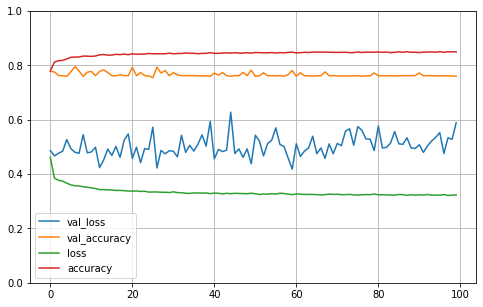

In [10]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
model.evaluate(X_test,y_test)

15060/15060 [==============================] - 0s 22us/step


[0.5887737494065942, 0.7595617771148682]

In [12]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test) )

0.7595617529880478

# Zad.
Do poniższego modelu dodaj
 
```python
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
```

w każdej warstwie.

Zwizualizuj wyniki:

* porównaj krzywe uczenia
* narysuj granice decyzyjne (dane są w 2D)




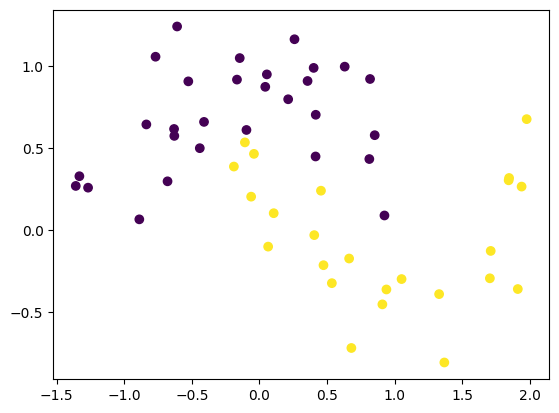

In [8]:
from sklearn.datasets import make_moons
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=5)
# split into train and test
# n_train = 30
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=2)

n_train=53
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.show()

In [9]:
from keras.callbacks import History


history_Adam = History()
model = Sequential()
model.add(Dense(1000,activation="relu",input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(500,activation="sigmoid"))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(200,activation="sigmoid"))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=1000, callbacks=[history_Adam])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              3000      
                                                                 
 batch_normalization_3 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 batch_normalization_4 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 500)              

2/2 [==============================] - 0s 28ms/step - loss: 0.0540 - accuracy: 1.0000 - val_loss: 1.1254 - val_accuracy: 0.4468
Epoch 46/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0563 - accuracy: 0.9811 - val_loss: 1.1378 - val_accuracy: 0.4468
Epoch 47/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0720 - accuracy: 0.9623 - val_loss: 1.1501 - val_accuracy: 0.4468
Epoch 48/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.1961 - accuracy: 0.9434 - val_loss: 1.1728 - val_accuracy: 0.4468
Epoch 49/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0510 - accuracy: 0.9811 - val_loss: 1.1818 - val_accuracy: 0.4468
Epoch 50/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0438 - accuracy: 1.0000 - val_loss: 1.1895 - val_accuracy: 0.4468
Epoch 51/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0487 - accuracy: 0.9811 - val_loss: 1.1976 - val_accuracy: 0.4468
Epoch 52/1000
2/2 [=

Epoch 103/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 1.1391 - val_accuracy: 0.4468
Epoch 104/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0872 - accuracy: 0.9811 - val_loss: 1.1444 - val_accuracy: 0.4468
Epoch 105/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 1.1290 - val_accuracy: 0.4468
Epoch 106/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 1.1245 - val_accuracy: 0.4468
Epoch 107/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 1.1308 - val_accuracy: 0.4468
Epoch 108/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 1.1490 - val_accuracy: 0.4468
Epoch 109/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 1.1719 - val_accuracy: 0.4468

2/2 [==============================] - 0s 28ms/step - loss: 0.0269 - accuracy: 0.9811 - val_loss: 0.6493 - val_accuracy: 0.7021
Epoch 161/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.6779 - val_accuracy: 0.4894
Epoch 162/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.6774 - val_accuracy: 0.4894
Epoch 163/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 0.6910 - val_accuracy: 0.4468
Epoch 164/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.6900 - val_accuracy: 0.4468
Epoch 165/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.6957 - val_accuracy: 0.4468
Epoch 166/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.7328 - val_accuracy: 0.4468
Epoch 167/1000

2/2 [==============================] - 0s 28ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.3382 - val_accuracy: 0.4468
Epoch 218/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 1.5119 - val_accuracy: 0.4468
Epoch 219/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0787 - accuracy: 0.9811 - val_loss: 1.0429 - val_accuracy: 0.4468
Epoch 220/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.4739 - val_accuracy: 0.7447
Epoch 221/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0774 - accuracy: 0.9811 - val_loss: 0.4407 - val_accuracy: 0.7660
Epoch 222/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0243 - accuracy: 0.9811 - val_loss: 0.5973 - val_accuracy: 0.5745
Epoch 223/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.8857 - val_accuracy: 0.4468
Epoch 224/1000

2/2 [==============================] - 0s 28ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 4.1905 - val_accuracy: 0.4468
Epoch 275/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 4.0332 - val_accuracy: 0.4468
Epoch 276/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0425 - accuracy: 0.9811 - val_loss: 2.8815 - val_accuracy: 0.4468
Epoch 277/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0248 - accuracy: 0.9811 - val_loss: 1.4267 - val_accuracy: 0.4681
Epoch 278/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 1.1590 - val_accuracy: 0.5532
Epoch 279/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 1.0068 - val_accuracy: 0.5957
Epoch 280/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.9551 - val_accuracy: 0.6383
Epoch 281/1000

2/2 [==============================] - 0s 28ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7980 - val_accuracy: 0.7021
Epoch 332/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.8119 - val_accuracy: 0.7021
Epoch 333/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.7883 - val_accuracy: 0.7021
Epoch 334/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.7342 - val_accuracy: 0.7021
Epoch 335/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6767 - val_accuracy: 0.7234
Epoch 336/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6231 - val_accuracy: 0.7660
Epoch 337/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5869 - val_accuracy: 0.7660
Epoch 338/1000

2/2 [==============================] - 0s 28ms/step - loss: 0.1090 - accuracy: 0.9434 - val_loss: 0.4429 - val_accuracy: 0.9149
Epoch 389/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.6522 - val_accuracy: 0.8511
Epoch 390/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0545 - accuracy: 0.9811 - val_loss: 0.4232 - val_accuracy: 0.9149
Epoch 391/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.2725 - val_accuracy: 0.9574
Epoch 392/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0316 - accuracy: 0.9811 - val_loss: 0.4261 - val_accuracy: 0.8936
Epoch 393/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0360 - accuracy: 0.9811 - val_loss: 0.4062 - val_accuracy: 0.8936
Epoch 394/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.3413 - val_accuracy: 0.8936
Epoch 395/1000

2/2 [==============================] - 0s 27ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3446 - val_accuracy: 0.8298
Epoch 446/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3583 - val_accuracy: 0.8511
Epoch 447/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.3681 - val_accuracy: 0.8298
Epoch 448/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3511 - val_accuracy: 0.8298
Epoch 449/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3355 - val_accuracy: 0.8511
Epoch 450/1000
2/2 [==============================] - 0s 27ms/step - loss: 9.1539e-04 - accuracy: 1.0000 - val_loss: 0.3238 - val_accuracy: 0.8511
Epoch 451/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3218 - val_accuracy: 0.8511
Epoch 452/

2/2 [==============================] - 0s 27ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 3.5371 - val_accuracy: 0.4468
Epoch 503/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 3.4870 - val_accuracy: 0.4468
Epoch 504/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 3.4769 - val_accuracy: 0.4468
Epoch 505/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 3.4726 - val_accuracy: 0.4468
Epoch 506/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 3.4932 - val_accuracy: 0.4468
Epoch 507/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 3.4709 - val_accuracy: 0.4468
Epoch 508/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 3.4004 - val_accuracy: 0.4468
Epoch 509/1000

2/2 [==============================] - 0s 27ms/step - loss: 0.0448 - accuracy: 0.9811 - val_loss: 1.6183 - val_accuracy: 0.4894
Epoch 560/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.4743 - val_accuracy: 0.4894
Epoch 561/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.3149 - val_accuracy: 0.5106
Epoch 562/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.1681 - val_accuracy: 0.5319
Epoch 563/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.0631 - val_accuracy: 0.5957
Epoch 564/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.9888 - val_accuracy: 0.6383
Epoch 565/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.9392 - val_accuracy: 0.6383
Epoch 566/1000

2/2 [==============================] - 0s 27ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1302 - val_accuracy: 0.9787
Epoch 617/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1291 - val_accuracy: 0.9787
Epoch 618/1000
2/2 [==============================] - 0s 27ms/step - loss: 8.1016e-04 - accuracy: 1.0000 - val_loss: 0.1292 - val_accuracy: 0.9787
Epoch 619/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1300 - val_accuracy: 0.9787
Epoch 620/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1315 - val_accuracy: 0.9787
Epoch 621/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1335 - val_accuracy: 0.9787
Epoch 622/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1362 - val_accuracy: 0.9787
Epoch 623/

2/2 [==============================] - 0s 27ms/step - loss: 3.7557e-04 - accuracy: 1.0000 - val_loss: 0.1906 - val_accuracy: 0.9787
Epoch 673/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.1984 - val_accuracy: 0.9787
Epoch 674/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.2098 - val_accuracy: 0.9787
Epoch 675/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.2206 - val_accuracy: 0.9787
Epoch 676/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.2295 - val_accuracy: 0.9787
Epoch 677/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.2350 - val_accuracy: 0.9787
Epoch 678/1000
2/2 [==============================] - 0s 27ms/step - loss: 5.0640e-04 - accuracy: 1.0000 - val_loss: 0.2507 - val_accuracy: 0.9574
Epoch 

2/2 [==============================] - 0s 28ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3859 - val_accuracy: 0.9362
Epoch 729/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.3478 - val_accuracy: 0.9574
Epoch 730/1000
2/2 [==============================] - 0s 28ms/step - loss: 4.7258e-04 - accuracy: 1.0000 - val_loss: 0.3150 - val_accuracy: 0.9574
Epoch 731/1000
2/2 [==============================] - 0s 28ms/step - loss: 3.5966e-04 - accuracy: 1.0000 - val_loss: 0.2921 - val_accuracy: 0.9574
Epoch 732/1000
2/2 [==============================] - 0s 28ms/step - loss: 3.5887e-04 - accuracy: 1.0000 - val_loss: 0.2769 - val_accuracy: 0.9574
Epoch 733/1000
2/2 [==============================] - 0s 28ms/step - loss: 4.2205e-04 - accuracy: 1.0000 - val_loss: 0.2683 - val_accuracy: 0.9574
Epoch 734/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.2715 - val_accuracy: 0.957

2/2 [==============================] - 0s 28ms/step - loss: 4.8668e-04 - accuracy: 1.0000 - val_loss: 0.2427 - val_accuracy: 0.9574
Epoch 785/1000
2/2 [==============================] - 0s 27ms/step - loss: 3.9267e-04 - accuracy: 1.0000 - val_loss: 0.2410 - val_accuracy: 0.9574
Epoch 786/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.5779e-04 - accuracy: 1.0000 - val_loss: 0.2386 - val_accuracy: 0.9574
Epoch 787/1000
2/2 [==============================] - 0s 26ms/step - loss: 2.4683e-04 - accuracy: 1.0000 - val_loss: 0.2365 - val_accuracy: 0.9574
Epoch 788/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2325 - val_accuracy: 0.9574
Epoch 789/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.6458e-04 - accuracy: 1.0000 - val_loss: 0.2276 - val_accuracy: 0.9574
Epoch 790/1000
2/2 [==============================] - 0s 27ms/step - loss: 5.1751e-04 - accuracy: 1.0000 - val_loss: 0.2245 - val_accurac

Epoch 840/1000
2/2 [==============================] - 0s 27ms/step - loss: 2.7250e-04 - accuracy: 1.0000 - val_loss: 0.3994 - val_accuracy: 0.8936
Epoch 841/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.5477 - val_accuracy: 0.8723
Epoch 842/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.3775 - val_accuracy: 0.8936
Epoch 843/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0339 - accuracy: 0.9811 - val_loss: 0.2353 - val_accuracy: 0.9787
Epoch 844/1000
2/2 [==============================] - 0s 27ms/step - loss: 8.1791e-04 - accuracy: 1.0000 - val_loss: 0.2364 - val_accuracy: 0.9574
Epoch 845/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.2355 - val_accuracy: 0.9574
Epoch 846/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2124 - val_accuracy

Epoch 897/1000
2/2 [==============================] - 0s 28ms/step - loss: 4.4236e-04 - accuracy: 1.0000 - val_loss: 2.3540 - val_accuracy: 0.5319
Epoch 898/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.2337 - val_accuracy: 0.5319
Epoch 899/1000
2/2 [==============================] - 0s 26ms/step - loss: 5.5429e-04 - accuracy: 1.0000 - val_loss: 2.1202 - val_accuracy: 0.5319
Epoch 900/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.9841 - val_accuracy: 0.5532
Epoch 901/1000
2/2 [==============================] - 0s 26ms/step - loss: 9.3248e-04 - accuracy: 1.0000 - val_loss: 1.7821 - val_accuracy: 0.5957
Epoch 902/1000
2/2 [==============================] - 0s 27ms/step - loss: 4.5189e-04 - accuracy: 1.0000 - val_loss: 1.5606 - val_accuracy: 0.6170
Epoch 903/1000
2/2 [==============================] - 0s 26ms/step - loss: 7.4235e-04 - accuracy: 1.0000 - val_loss: 1.3675 - 

Epoch 954/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.2547 - val_accuracy: 0.8936
Epoch 955/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.4921 - val_accuracy: 0.8298
Epoch 956/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.9347 - val_accuracy: 0.6809
Epoch 957/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.3733 - val_accuracy: 0.5957
Epoch 958/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.6787 - val_accuracy: 0.6170
Epoch 959/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 1.8350 - val_accuracy: 0.6170
Epoch 960/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.0161 - accuracy: 0.9811 - val_loss: 1.6954 - val_accuracy: 0.6170

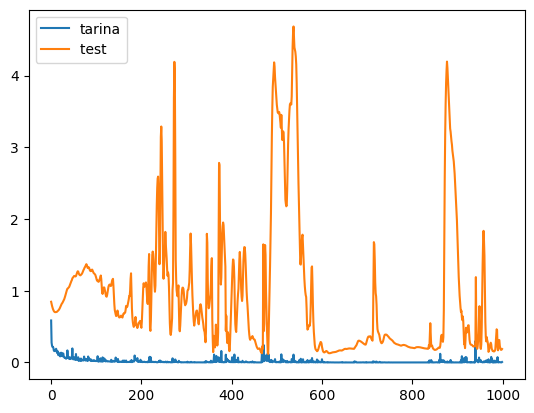

In [10]:
plt.plot(history_Adam.history['loss'], label = "tarina")
plt.plot(history_Adam.history['val_loss'], label = "test ")


plt.legend()
plt.show()

9600/9600 [==============================] - 16s 2ms/step


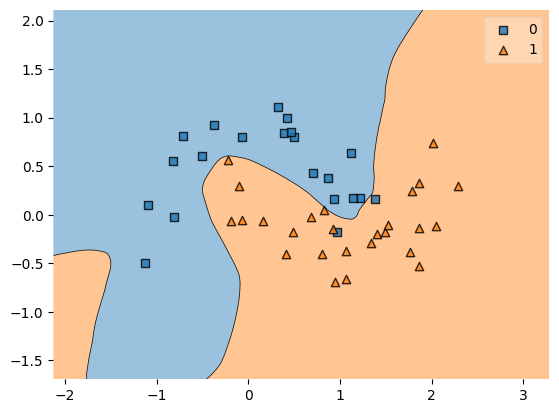

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, model)
plt.show()